In [1]:
from lightgbm import LGBMClassifier
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris, load_digits
from sklearn.tree import export_text
import lightgbm
digits = load_digits()
X = digits.data
y = digits.target
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.4)

In [2]:
 params = {
    'boosting_type': 'gbdt',
    'objective': 'multiclass',
    'metric': 'multi_logloss,auc_mu',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'is_training_metric' : True,
    'num_iterations' : 100,
    'metric_freq' : 1,
    'max_bin' : 255,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'num_class' : 10,
    'verbose': 0
}

In [3]:
lgb_train = lightgbm.Dataset(X_tr, y_tr)
m = lightgbm.train(params,lgb_train)
m.save_model('m.txt')

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005065 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

7
0.0 11.0 0.0 0.0 6.0 0.0 5.0 16.0 14.0 14.0 5.0 15.0 9.0 15.0 4.0 10.0 14.0 8.0 5.0 14.0 6.0


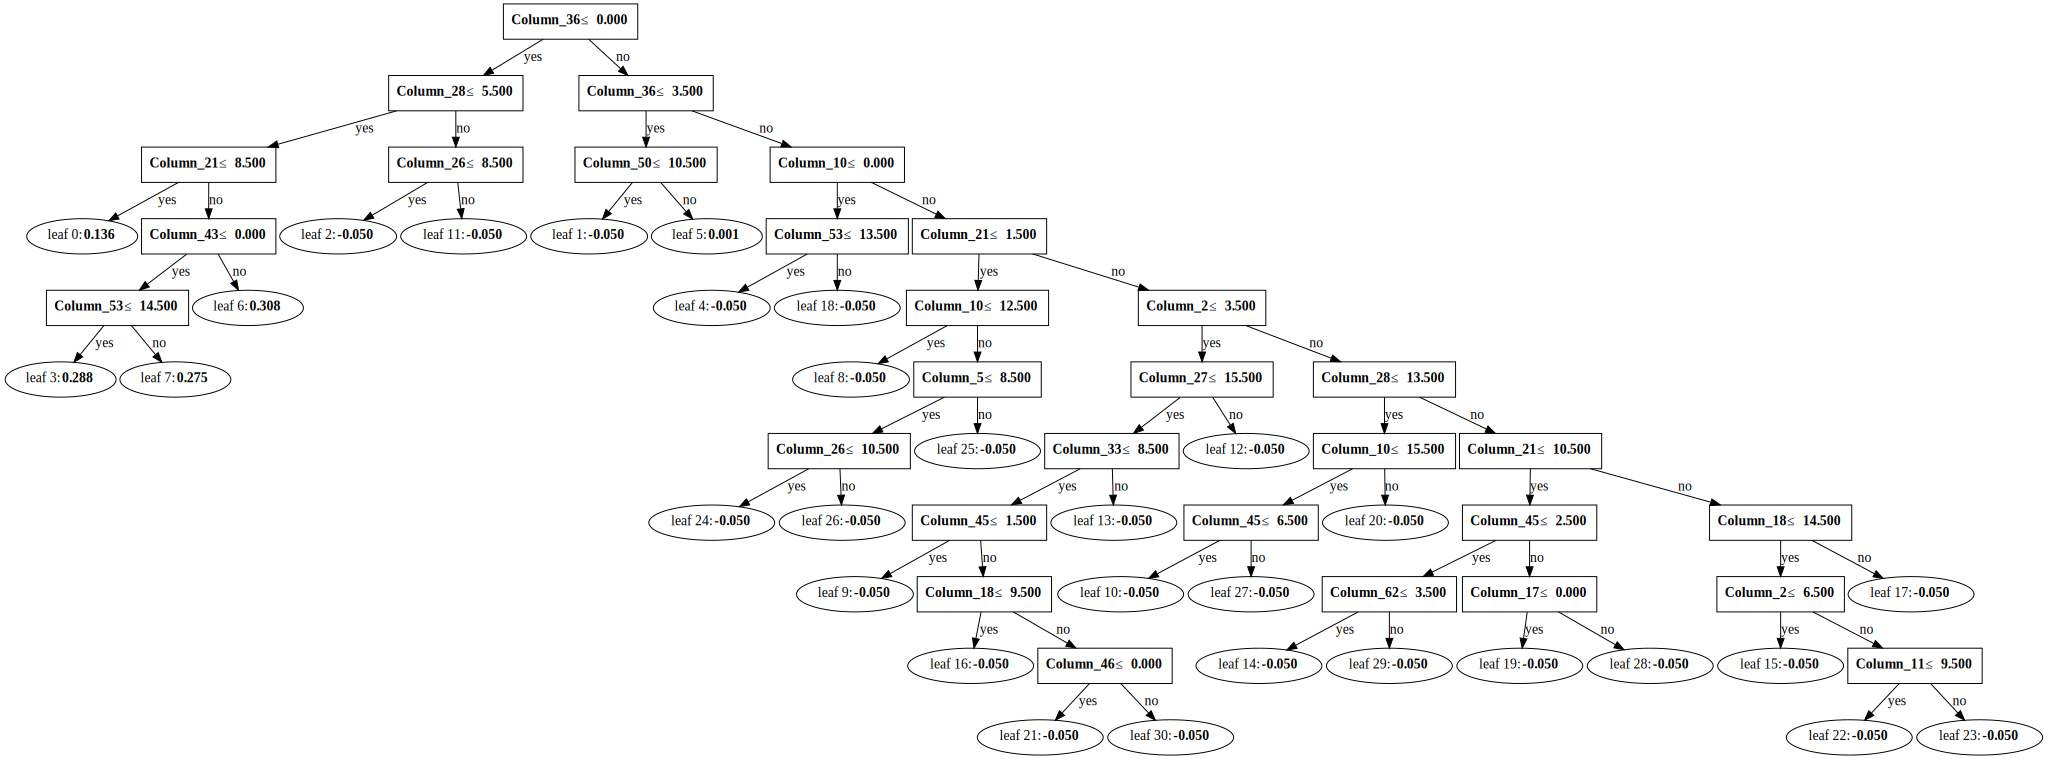

In [8]:

m = lightgbm.Booster(model_file='m.txt')
pred_X = m.predict(X_te, num_iteration=m.best_iteration,pred_leaf=True)
print(pred_X[1][10])
print(X_te[1][36] ,X_te[1][42] ,X_te[1][43] ,X_te[1][5] ,X_te[1][45] ,X_te[1][62] ,X_te[1][41] ,X_te[1][18] ,X_te[1][10] ,X_te[1][60] ,X_te[1][54] ,X_te[1][26] ,X_te[1][13] ,X_te[1][21] ,X_te[1][37] ,X_te[1][51] ,X_te[1][3] ,X_te[1][33] ,X_te[1][52] ,X_te[1][12], X_te[1][27])

# print(m.feature_importance())
# print('The rmse of prediction is:', mean_squared_error(y_te, pred_X) ** 0.5)
# accuracy = accuracy_score(y_true=y_te, y_pred=pred_X)
# print('Catboost accuracy : {}%'.format(accuracy*100))

# r =lightgbm.create_tree_digraph(m, tree_index=4, orientation='vertical')
# r.render(view=True)
lightgbm.create_tree_digraph(m, tree_index=10, orientation='vertical')

In [9]:
pred_X = m.predict(X_te, num_iteration=m.best_iteration,pred_leaf=False)
print(pred_X[1])
print(max(pred_X[1]))

[0.32604046 0.07330141 0.07701134 0.06569745 0.06245889 0.06945327
 0.0619331  0.07575855 0.06380758 0.12453795]
0.3260404556372887


In [4]:
import json
model_json = m.dump_model()

with open('m.json', 'w') as f:
    json.dump(model_json, f, indent=4)

In [54]:
f = open('m.json','r') 
data = json.load(f)

for tree in data['tree_info']:
    if tree['tree_index']==19:
        tree_structure = tree['tree_structure']

        with open('ex.json','w') as F:
            json.dump(tree_structure,F,indent=2)

In [3]:
model = LGBMClassifier()
model.fit(X_tr, y_tr, eval_metric='multi_logloss')
pred_X = model.predict(X_te)
print(pred_X)
# evaluating accuracy
accuracy = accuracy_score(y_true=y_te, y_pred=pred_X)
print('Catboost accuracy : {}%'.format(accuracy*100))


[9 3 7 5 2 6 8 1 5 7 7 0 8 0 6 6 1 3 5 7 0 1 0 3 6 1 7 7 6 5 8 0 8 7 9 3 3
 0 7 0 9 4 7 9 4 4 3 0 5 4 2 6 8 9 8 9 2 2 9 3 8 3 0 7 9 6 6 2 6 9 8 0 2 3
 2 8 8 9 4 9 3 4 5 0 9 5 6 4 3 0 1 1 8 9 1 1 0 8 2 6 8 2 0 0 7 9 7 8 3 1 0
 4 4 8 7 7 5 6 9 8 9 6 7 7 4 5 3 3 1 5 4 6 3 7 2 4 2 4 1 2 5 2 2 5 5 2 8 4
 4 4 6 6 1 1 0 4 4 8 8 8 2 7 7 3 6 1 5 9 1 6 4 4 5 3 8 4 5 2 1 4 4 1 4 0 0
 9 6 9 4 2 3 3 1 0 0 3 0 2 9 0 7 3 1 7 8 5 7 8 3 2 3 7 2 6 2 4 0 8 3 1 4 8
 8 4 9 4 4 3 8 0 1 3 4 4 2 9 7 7 6 1 9 4 0 3 7 5 9 6 3 8 4 8 4 5 2 2 8 8 6
 7 5 9 9 1 7 3 8 1 6 1 0 8 5 5 3 4 0 2 4 1 5 0 5 7 6 9 2 6 9 6 3 5 2 8 1 0
 9 3 4 6 0 4 7 1 5 8 7 2 5 8 5 3 2 7 1 4 9 8 0 7 3 2 9 5 0 9 5 5 8 4 9 8 0
 5 9 3 2 4 0 7 6 5 4 3 1 6 7 8 7 3 5 6 2 0 9 7 3 5 1 0 2 8 4 9 3 3 6 2 5 4
 3 2 5 6 8 6 9 7 8 8 8 1 8 4 9 0 3 4 2 9 0 9 2 2 6 7 4 9 7 4 3 9 8 8 9 4 9
 5 4 6 2 0 5 3 2 2 9 1 1 1 2 4 1 8 9 7 1 2 3 5 6 5 4 8 0 9 9 5 7 4 3 6 9 0
 2 0 1 4 3 0 8 2 9 5 0 6 8 6 3 6 4 2 4 4 2 4 6 3 8 9 2 9 6 9 6 6 0 4 8 2 2
 4 2 3 7 0 7 2 1 8 5 0 3 